<a href="https://colab.research.google.com/github/glaria/TFM/blob/main/Colab%20Notebooks/2_TFM_data_preparation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ahora toca hacer un análisis descriptivo de los datos y prepararlos para los modelos.
Aquí será importante identificar el tipo de dato de cada columna.

En primer lugar montamos google drive para acceder a los datasets


In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

dataset1_path = '/content/gdrive/MyDrive/malware_datasets/kaggle_dataset_malware1.csv'
dataset2_path = '/content/gdrive/MyDrive/malware_datasets/github_dataset_malware1.csv'
dataset3_path = '/content/gdrive/MyDrive/malware_datasets/github_dataset_malware2.csv'
dataset4_path = '/content/gdrive/MyDrive/malware_datasets/benign_files_pe.csv'


df1 = pd.read_csv(dataset1_path)
df2 = pd.read_csv(dataset2_path, delimiter='|')
df3 = pd.read_csv(dataset3_path)
df4 = pd.read_csv(dataset4_path)

In [ ]:
print("Dataset 1:")
print(df1.info())

print("\nDataset 2:")
print(df2.info())

print("\nDataset 3:")
print(df3.info())

print("\nDataset 4:")
print(df4.info())


Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int

In [ ]:
df3.groupby('Malware_Type').size()


Malware_Type
Backdoor           1740
Downloader         2438
Generic Malware    6231
Ransomware         2376
Spyware            5766
dtype: int64

Debemos renombrar la columna legitimate del segundo dataset y cambiar su definición para que sea consistente con los otros datasets

In [ ]:
df2['legitimate'] = df2['legitimate'].apply(lambda x: 0 if x == 1 else 1)
df2.rename(columns={'legitimate': 'Malware'}, inplace=True)


El tercer dataset, por su parte, contiene datos multiclase, dado que todos los elementos son Malware debemos crear la columna 'Malware' y asignarle 1 a todos los registros

In [ ]:
df3['Malware'] = 1

In [ ]:
df3.head()

,SHA256,Malware_Type,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware
0,011af3a69ca68178ed40d746cb4f6b108b954290afb53d...,Spyware,23117,144,3,0,4,0,65535,0,...,1024,1443308,3,0,2097152,1048576,4096,0,16,1
1,011bdb01c6863489c07befe11070e58a2a5b0feffd8be8...,Generic Malware,23117,144,3,0,4,0,65535,0,...,512,0,2,34112,1048576,1048576,4096,0,16,1
2,e5a8176770ea11671eb417ac3f8b999b18b3d2e2be5557...,Generic Malware,23117,144,3,0,4,0,65535,0,...,512,0,3,34144,1048576,1048576,4096,0,16,1
3,6500927c19e228cc116484a103ba594fdeadccf0615933...,Ransomware,23117,80,2,0,4,15,65535,0,...,1024,0,2,0,1048576,1048576,4096,0,16,1
4,03aff1fde2776490687f40a87668e6e8f64d823af23a11...,Spyware,23117,144,3,0,4,0,65535,0,...,1024,435363,2,32768,1048576,1048576,4096,0,16,1


Un cambio a la configuración de pandas para que sea más fácil visualizar los dataframes

In [ ]:
pd.set_option('display.max_columns', 100) #max nr columns
pd.set_option('display.width', 1000) #max width


Ahora debemos ver que columnas comunes tenemos disponibles en los 4 datasets

In [ ]:
common_columns = set(df1.columns).intersection(set(df2.columns)).intersection(set(df3.columns)).intersection(set(df4.columns))

comparison_df = pd.DataFrame(columns=['Column', 'Dataset1_dtype', 'Dataset2_dtype', 'Dataset3_dtype'])

for column in common_columns:
    dataset1_dtype = df1[column].dtype
    dataset2_dtype = df2[column].dtype
    dataset3_dtype = df3[column].dtype
    dataset4_dtype = df4[column].dtype
    temp_df = pd.DataFrame({'Column': [column], 
                            'Dataset1_dtype': [dataset1_dtype], 
                            'Dataset2_dtype': [dataset2_dtype],
                            'Dataset3_dtype': [dataset3_dtype],
                            'Dataset4_dtype': [dataset4_dtype]})
    comparison_df = pd.concat([comparison_df, temp_df], ignore_index=True)

print(comparison_df)


                         Column Dataset1_dtype Dataset2_dtype Dataset3_dtype Dataset4_dtype
0         MinorSubsystemVersion          int64          int64          int64          int64
1                    BaseOfCode          int64          int64          int64          int64
2   MinorOperatingSystemVersion          int64          int64          int64          int64
3                     Subsystem          int64          int64          int64          int64
4             SizeOfHeapReserve          int64          int64          int64          int64
5            MinorLinkerVersion          int64          int64          int64          int64
6             MajorImageVersion          int64          int64          int64          int64
7            MajorLinkerVersion          int64          int64          int64          int64
8   MajorOperatingSystemVersion          int64          int64          int64          int64
9                      CheckSum          int64          int64          int64    

Ahora queremos ver que datos son comunes a ambos datasets.
'Name' por sí mismo no vale, pues archivos con el mismo nombre pueden tener contenido distinto por diferencias en la compilación o cambios en las versiones, además de que no está disponible en el dataset3
Los candidatos ideales a clave única serían 'md5' o 'sha256', pero no se trata de un campo común a todos los datasets.
Por tanto, utilizaremos una combinación de campos:   SizeOfCode', 'AddressOfEntryPoint'  y 'CheckSum'

In [ ]:
df1['combined_key'] = df1['SizeOfCode'].astype(str) + '_' + df1['AddressOfEntryPoint'].astype(str) + '_' + df1['CheckSum'].astype(str)
df2['combined_key'] = df2['SizeOfCode'].astype(str) + '_' + df2['AddressOfEntryPoint'].astype(str) + '_' + df2['CheckSum'].astype(str)
df3['combined_key'] = df3['SizeOfCode'].astype(str) + '_' + df3['AddressOfEntryPoint'].astype(str) + '_' + df3['CheckSum'].astype(str)
df4['combined_key'] = df4['SizeOfCode'].astype(str) + '_' + df4['AddressOfEntryPoint'].astype(str) + '_' + df4['CheckSum'].astype(str)


common_records_12 = set(df1['combined_key']).intersection(set(df2['combined_key']))
common_records_13 = set(df1['combined_key']).intersection(set(df3['combined_key']))
common_records_23 = set(df2['combined_key']).intersection(set(df3['combined_key']))
common_records_14 = set(df1['combined_key']).intersection(set(df4['combined_key']))
common_records_24 = set(df2['combined_key']).intersection(set(df4['combined_key']))
common_records_34 = set(df3['combined_key']).intersection(set(df4['combined_key']))


print(f" {len(common_records_12)} registros comunes en datasets 1 y 2")
print(f" {len(common_records_13)} registros comunes en datasets 1 y 3")
print(f" {len(common_records_23)} registros comunes en datasets 2 y 3")
print(f" {len(common_records_14)} registros comunes en datasets 1 y 4")
print(f" {len(common_records_24)} registros comunes en datasets 2 y 4")
print(f" {len(common_records_34)} registros comunes en datasets 3 y 4")


 777 registros comunes en datasets 1 y 2
 104 registros comunes en datasets 1 y 3
 133 registros comunes en datasets 2 y 3
 27 registros comunes en datasets 1 y 4
 58 registros comunes en datasets 2 y 4
 7 registros comunes en datasets 3 y 4


Por último, unimos los 4 dataframes conservando en una columna la procedencia del dato.
Y nos quedamos con los datos únicos

In [ ]:
#incluimos una columna extra para conocer el origen
df1 = df1[common_columns]
df2 = df2[common_columns]
df3 = df3[common_columns]
df4 = df4[common_columns]


df1['data_source'] = 'dataset 1'
df2['data_source'] = 'dataset 2'
df3['data_source'] = 'dataset 3'
df4['data_source'] = 'dataset 4'

# Combinamos los 4 datasets 
df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

#duplicados eliminados
df_combined = df_combined.drop_duplicates(subset=common_columns, keep='first')



<ipython-input-11-48c2f80416e8>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1 = df1[common_columns]
<ipython-input-11-48c2f80416e8>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2 = df2[common_columns]
<ipython-input-11-48c2f80416e8>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df3 = df3[common_columns]
<ipython-input-11-48c2f80416e8>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df4 = df4[common_columns]
<ipython-input-11-48c2f80416e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [ ]:
df_combined.head()

,MinorSubsystemVersion,BaseOfCode,MinorOperatingSystemVersion,Subsystem,SizeOfHeapReserve,MinorLinkerVersion,MajorImageVersion,MajorLinkerVersion,MajorOperatingSystemVersion,CheckSum,SizeOfCode,DllCharacteristics,SizeOfHeaders,Malware,NumberOfRvaAndSizes,Characteristics,MajorSubsystemVersion,SizeOfHeapCommit,SizeOfInitializedData,MinorImageVersion,AddressOfEntryPoint,FileAlignment,SizeOfOptionalHeader,SectionAlignment,SizeOfUninitializedData,ImageBase,SizeOfImage,LoaderFlags,SizeOfStackReserve,Machine,data_source
0,2,4096,0,2,1048576,0,6,8,6,295281,54784,32832,1024,1,16,34,5,4096,189440,0,51316,512,240,4096,0,4.294967e+09,274432,0,524288,34404,dataset 1
1,0,4096,0,2,1048576,0,0,9,5,0,205824,33088,1024,1,16,258,5,4096,139264,0,84654,512,224,4096,0,4.194304e+06,442368,0,1048576,332,dataset 1
2,0,256,0,2,1048576,0,0,6,4,0,24576,0,4096,1,528,14,4,69632,20480,0,27364,4096,224,4096,0,4.194304e+06,49152,0,1048576,332,dataset 1
3,0,4096,0,2,1048576,22,6,2,4,14174816,34304,32768,1024,1,16,783,4,4096,28160,0,16685,512,224,4096,297472,4.194304e+06,1032192,0,2097152,332,dataset 1
4,0,4096,0,2,1048576,56,1,2,4,0,8192,0,1024,1,16,783,4,4096,89600,0,4416,512,224,4096,512,4.194304e+06,110592,0,2097152,332,dataset 1


# Análisis de datos

Ya estamos en condiciones de analizar los datos de los datasets combinados 

Total de registros: 133796
   Malware data_source  count
0        0   dataset 1   4957
1        0   dataset 2  40846
2        0   dataset 4   5674
3        1   dataset 1  10936
4        1   dataset 2  57689
5        1   dataset 3  13694


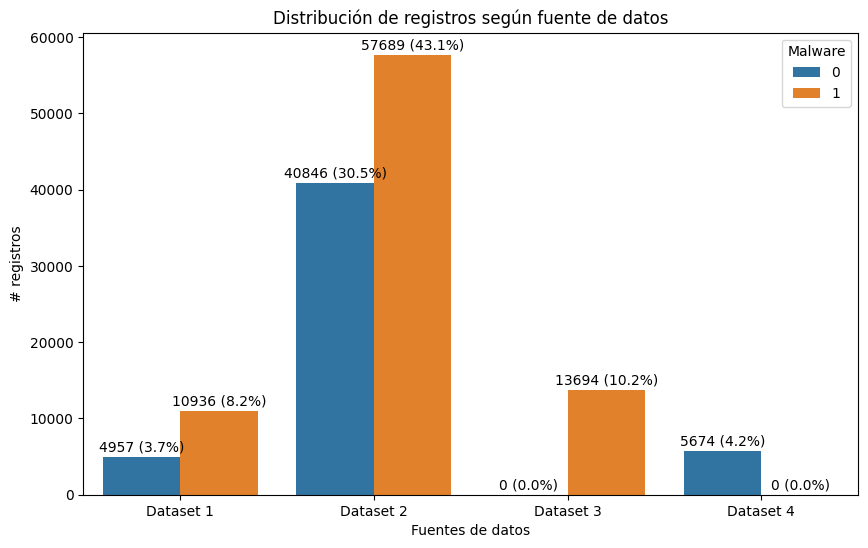

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Conteo total de registros
total_records = len(df_combined)
print(f"Total de registros: {total_records}")

'''
# Conteo de nombres únicos
unique_names_count = df_combined['Name'].nunique()
print(f"Número de nombres únicos: {unique_names_count}")
'''

# Distribución de conteos por columna 'Malware' y 'data_source'
malware_data_source_counts = df_combined.groupby(['Malware', 'data_source']).size().reset_index(name='count')
print(malware_data_source_counts)


# Creamos un MultiIndex con todas las combinaciones posibles de 'Malware' y 'data_source'
idx = pd.MultiIndex.from_product([malware_data_source_counts['Malware'].unique(),
                                  malware_data_source_counts['data_source'].unique()],
                                 names=['Malware', 'data_source'])

malware_data_source_counts = malware_data_source_counts.set_index(['Malware', 'data_source']).reindex(idx, fill_value=0).reset_index()

df = malware_data_source_counts.copy()

df['data_source'] = df['data_source'].str.replace('dataset', 'Dataset')

# orden correcto de las sources
df['data_source'] = pd.Categorical(df['data_source'], categories=['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'], ordered=True)

df.sort_values('data_source', inplace=True)

# gráfico
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='data_source', y='count', hue='Malware', ax=ax)
ax.set_xlabel("Fuentes de datos")
ax.set_ylabel("# registros")
#etiquetas por encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({(p.get_height()/total_records)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', color='black', xytext=(0, 2), 
                 textcoords='offset points')

plt.title("Distribución de registros según fuente de datos")
plt.show()



<ipython-input-14-8673726467c7>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_df1 = df_combined[common_columns].corr()


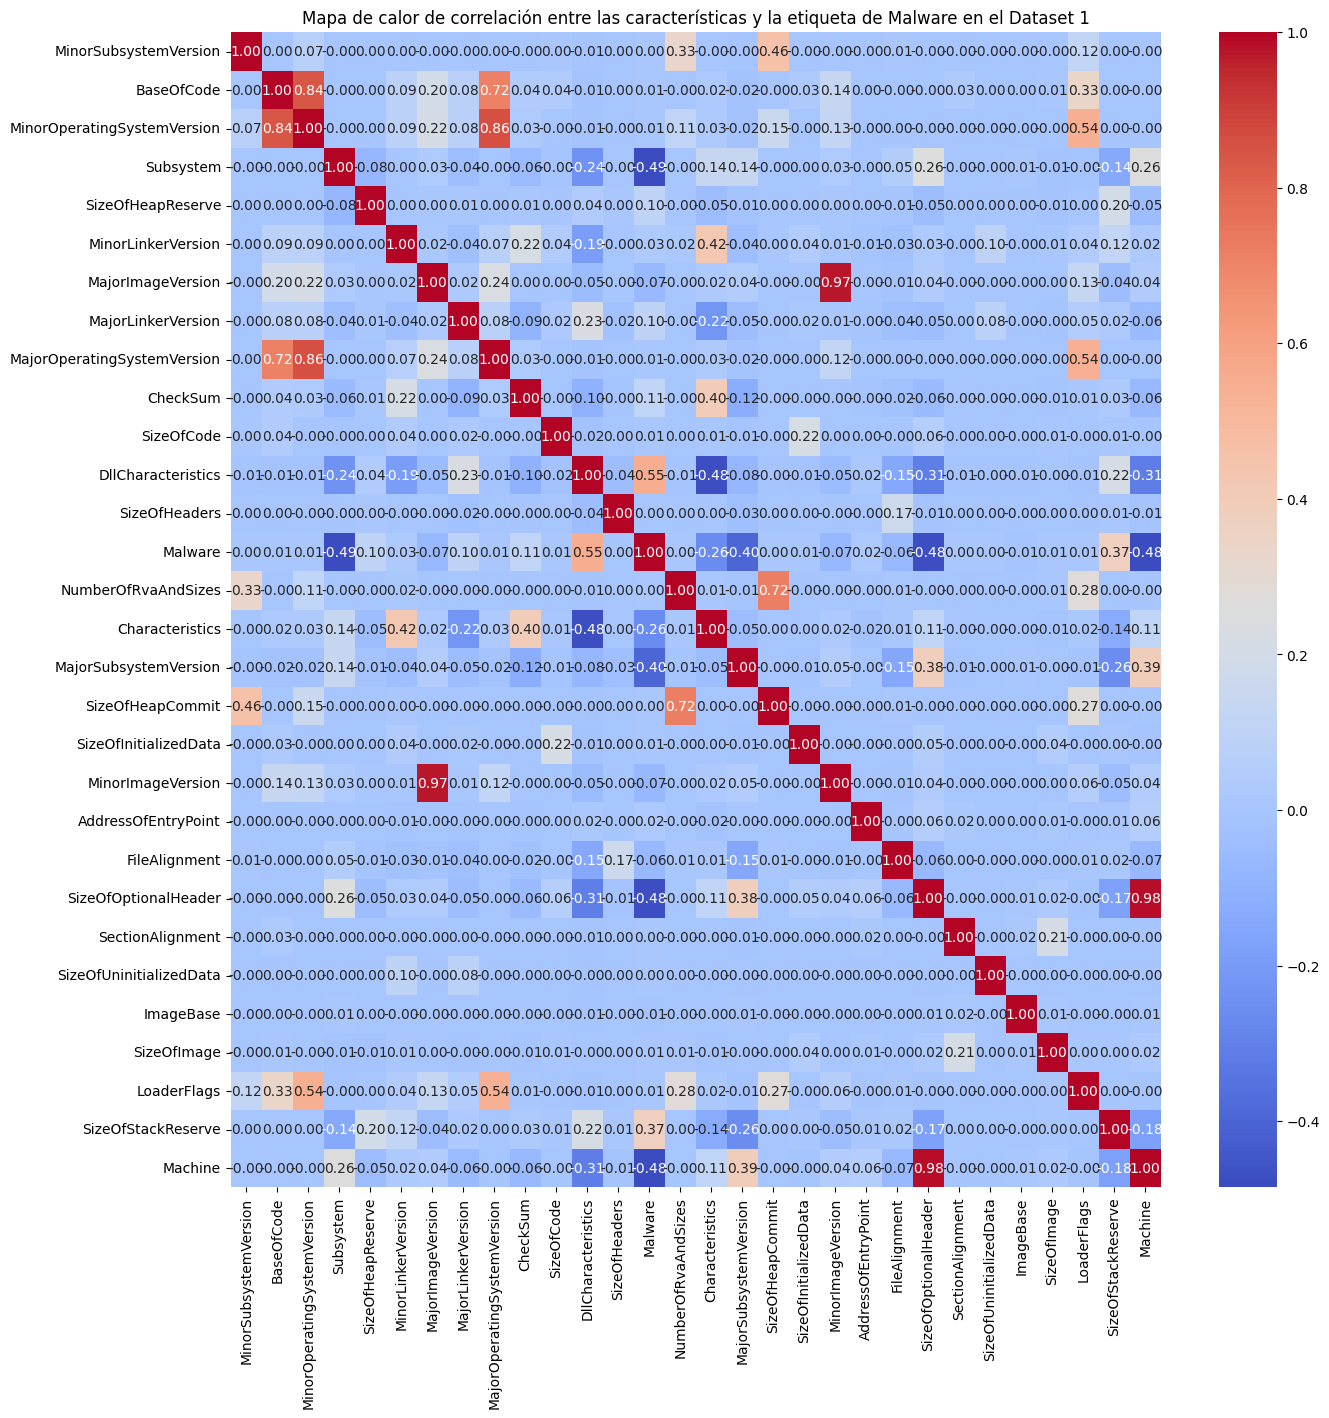

In [ ]:
plt.figure(figsize=(15, 15))
correlation_matrix_df1 = df_combined[common_columns].corr()
sns.heatmap(correlation_matrix_df1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación entre las características y la etiqueta de Malware en el Dataset 1")
plt.show()


# Poda de algunos datasets
Vamos a podar el dataset 2, pues representa casi 3 veces la suma de los otros 3 datasets. 
Además, vamos a equilibrar ambas clases en esta poda, de forma que nos queden 10000 elementos de cada una

In [ ]:
df2 = df2.groupby('Malware').sample(10005, random_state=42)
# Combinamos los 4 datasets 
df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

#duplicados eliminados
df_combined = df_combined.drop_duplicates(subset=common_columns, keep='first')


Algunas visualizaciones extra

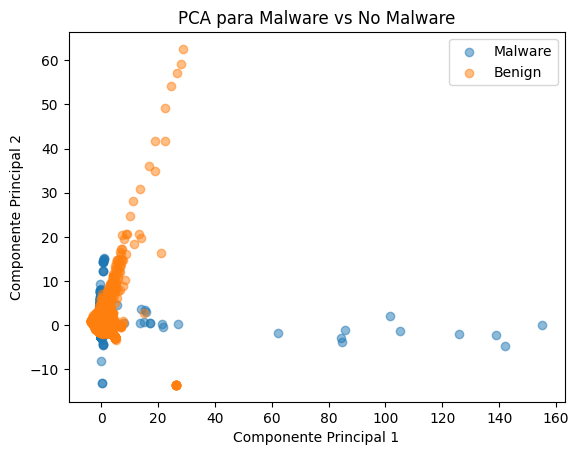

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def prepare_and_apply_pca(df):
    numeric_df = df.select_dtypes(include=np.number).fillna(0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    pca = PCA(n_components=2)
    return pca.fit_transform(scaled_data)

malware_df = df_combined[df_combined['Malware'] == 1]
benign_df = df_combined[df_combined['Malware'] == 0]

#projectamos a 2D con PCA
malware_pca_data = prepare_and_apply_pca(malware_df)
benign_pca_data = prepare_and_apply_pca(benign_df)

#visualizacion
plt.scatter(malware_pca_data[:, 0], malware_pca_data[:, 1], label='Malware', alpha=0.5)
plt.scatter(benign_pca_data[:, 0], benign_pca_data[:, 1], label='Benign', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA para Malware vs No Malware')
plt.legend()
plt.show()



Quitamos elementos de la clase Malware 

In [ ]:

#nos quedamos con una cantidad aleatoria de elementos de la clase malware igual a la clase benigna
malware_df_pruned = malware_df.sample(20627, random_state=42)

#volvemos a unir los 2 df e incluimos indice
balanced_df = pd.concat([benign_df, malware_df_pruned])
balanced_df.reset_index(drop=True, inplace=True)


In [ ]:
balanced_df.groupby('Malware').size().reset_index(name='count')

,Malware,count
0,0,20628
1,1,20627


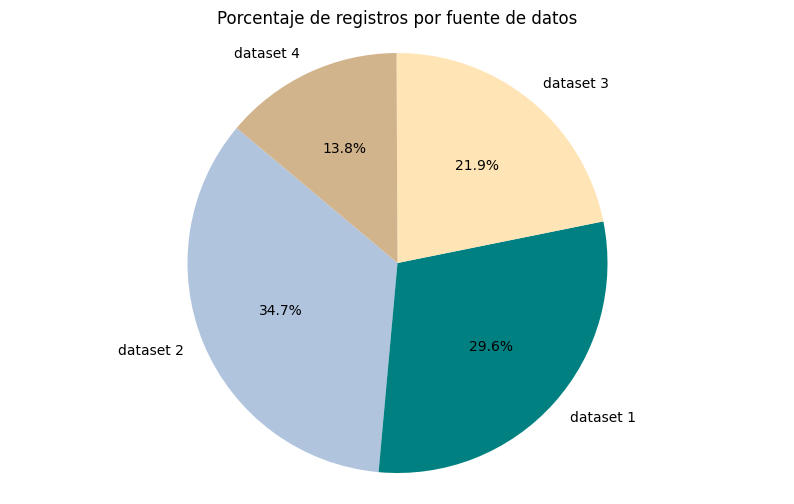

In [ ]:
counts = balanced_df['data_source'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors = ['lightsteelblue', 'teal', 'moccasin', 'tan'])
plt.axis('equal') 
plt.title('Porcentaje de registros por fuente de datos')
plt.show()


exportamos balanced_df a csv

In [ ]:
#balanced_df.to_csv('/content/gdrive/MyDrive/malware_datasets/balanced_df.csv', index=False)
